In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
barnett = pd.read_csv('Barnett_density_data.csv')
GOM = pd.read_csv('GOM_offshore_density_data.csv')

In [3]:
# barnett = barnett.dropna()
# GOP = GOM.dropna()

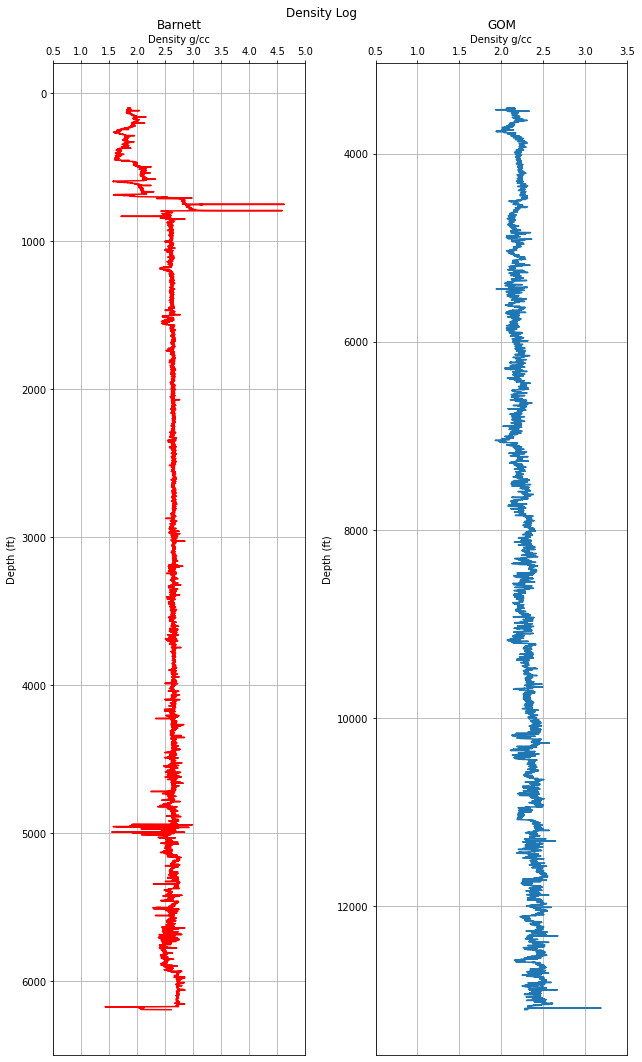

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(9 , 15))
fig.suptitle('Density Log')

ax[0].plot(barnett['Density (g/cc)'], barnett['Depth(ft)'], color='red')
ax[0].set_xlabel('Density g/cc')
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[0].set_xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
ax[0].invert_yaxis()
ax[0].set_ylabel('Depth (ft)')
ax[0].set_title('Barnett')
ax[0].grid()
###########

ax[1].plot(GOM['Density (g/cc)'], GOM['Depth(ft)'])
ax[1].set_title('GOM')
ax[1].invert_yaxis()
ax[1].set_xlabel('Density g/cc')
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top')
ax[1].set_xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5])
ax[1].set_ylabel('Depth (ft)')
ax[1].grid()

plt.tight_layout(pad=1.0)
plt.show()

In [5]:
# Extrapolate Barnett
columns = barnett.columns.to_list()

depths = np.arange(0, 100.5, .5)
density = np.repeat(1.8778, depths.shape[0])

df2 = pd.DataFrame()
df2[columns[0]] = depths
df2[columns[1]] = density

barnett = pd.concat([df2, barnett], ignore_index=True)

In [6]:
# Extrapolate GOM
wt_dep = np.arange(0, 1000, 1)
wt_den = np.repeat(1, wt_dep.shape[0])

form_dep = np.arange(1000, 3516, 1)
form_den = np.interp(form_dep, [1000, 3515], [1.7, 2.154])

mssn_dep = np.concatenate((wt_dep, form_dep))[:-1]
mssn_den = np.concatenate((wt_den, form_den))[:-1]

df2 = pd.DataFrame()
df2[columns[0]] = mssn_dep
df2[columns[1]] = mssn_den

GOM = pd.concat([df2, GOM], ignore_index=True)


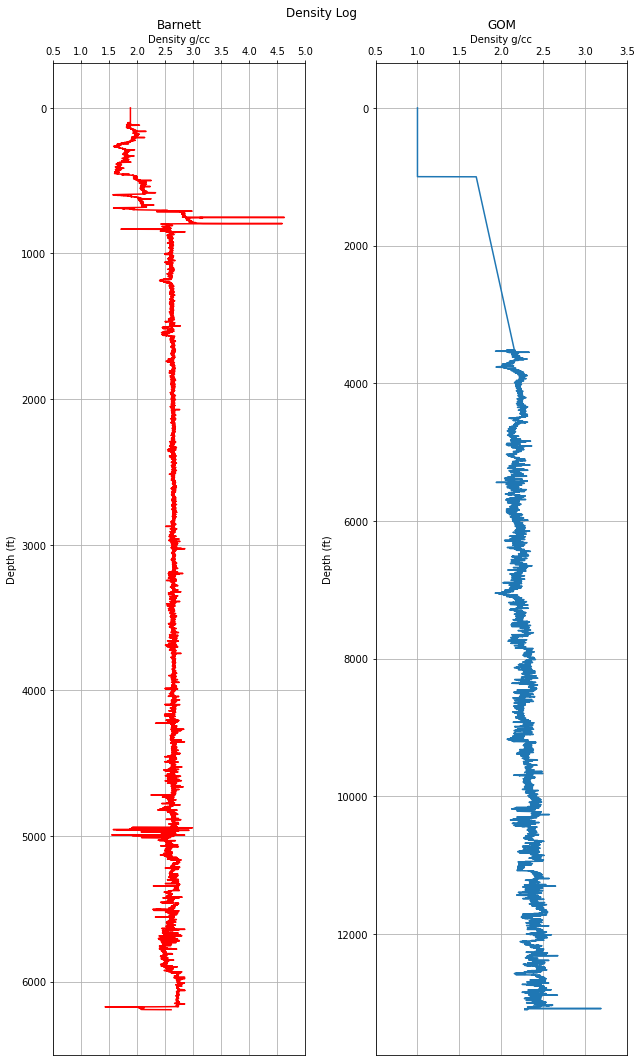

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(9 , 15))
fig.suptitle('Density Log')

ax[0].plot(barnett['Density (g/cc)'], barnett['Depth(ft)'], color='red')
ax[0].invert_yaxis()
ax[0].set_xlabel('Density g/cc')
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[0].set_xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
ax[0].set_ylabel('Depth (ft)')
ax[0].set_title('Barnett')
ax[0].grid()
###########

ax[1].plot(GOM['Density (g/cc)'], GOM['Depth(ft)'])
ax[1].set_title('GOM')
ax[1].invert_yaxis()
ax[1].set_xlabel('Density g/cc')
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top')
ax[1].set_xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5])
ax[1].set_ylabel('Depth (ft)')
ax[1].grid()

plt.tight_layout(pad=1.0)
plt.show()

In [8]:
barnett[barnett['Depth(ft)'] == 4000]

,Depth(ft),Density (g/cc)
8000,4000.0,2.6606


In [9]:
GOM[GOM['Depth(ft)'] == 8600]

,Depth(ft),Density (g/cc)
8600,8600,2.294


In [10]:
from scipy import integrate

In [11]:
def Integrate(df):
    Sv = []
    for z in df['Depth(ft)']:
        den = df[df['Depth(ft)'] <= z]['Density (g/cc)']
        dep = df[df['Depth(ft)'] <= z]['Depth(ft)']
        
        sv = .433 * integrate.simpson(den, dep)
        Sv.append(round(sv, 4))
    return Sv

In [12]:
barnett['Overburden (psi)'] = Integrate(barnett)
GOM['Overburden (psi)'] = Integrate(GOM)

In [13]:
barnett[barnett['Depth(ft)'] == 5000]

,Depth(ft),Density (g/cc),Overburden (psi)
10000,5000.0,2.4061,5479.7206


In [14]:
barnett['Hydrostatic pressure (psi)'] = 0.44*barnett['Depth(ft)']
GOM['Hydrostatic pressure (psi)'] = 0.44*GOM['Depth(ft)']

In [15]:
barnett[barnett['Depth(ft)'] == 5500]

,Depth(ft),Density (g/cc),Overburden (psi),Hydrostatic pressure (psi)
11000,5500.0,2.594,6045.8212,2420.0


In [16]:
GOM[GOM['Depth(ft)'] == 10000]

,Depth(ft),Density (g/cc),Overburden (psi),Hydrostatic pressure (psi)
10000,10000,2.364,8778.8624,4400.0


In [17]:
GOM[GOM['Depth(ft)'] == 7500]

,Depth(ft),Density (g/cc),Overburden (psi),Hydrostatic pressure (psi)
7500,7500,2.138,6303.206,3300.0


In [18]:
barnett['Overburden Gradient (psi/ft)'] = barnett['Overburden (psi)']/barnett['Depth(ft)']
GOM['Overburden Gradient (psi/ft)'] = GOM['Overburden (psi)']/GOM['Depth(ft)']

In [19]:
barnett[barnett['Depth(ft)'] == 5500]

,Depth(ft),Density (g/cc),Overburden (psi),Hydrostatic pressure (psi),Overburden Gradient (psi/ft)
11000,5500.0,2.594,6045.8212,2420.0,1.09924


In [20]:
GOM[GOM['Depth(ft)'] == 11000]

,Depth(ft),Density (g/cc),Overburden (psi),Hydrostatic pressure (psi),Overburden Gradient (psi/ft)
11000,11000,2.35,9798.5664,4840.0,0.890779


In [21]:
barnett['Porosity'] = (2.71 - barnett['Density (g/cc)'])/(2.71 - 1)
GOM['Porosity'] = (2.71 - GOM['Density (g/cc)'])/(2.71 - 1)

In [22]:
barnett[barnett['Depth(ft)'] == 5300]

,Depth(ft),Density (g/cc),Overburden (psi),Hydrostatic pressure (psi),Overburden Gradient (psi/ft),Porosity
10600,5300.0,2.6105,5817.0963,2332.0,1.097565,0.058187


In [23]:
GOM[GOM['Depth(ft)'] == 8200]

,Depth(ft),Density (g/cc),Overburden (psi),Hydrostatic pressure (psi),Overburden Gradient (psi/ft),Porosity
8200,8200,2.364,6993.1935,3608.0,0.852828,0.202339


In [24]:
barnett['Hydrostatic pressure gradient (psi/ft)'] = 0.44
GOM['Hydrostatic pressure gradient (psi/ft)'] = 0.44

In [25]:
barnett.head()

,Depth(ft),Density (g/cc),Overburden (psi),Hydrostatic pressure (psi),Overburden Gradient (psi/ft),Porosity,Hydrostatic pressure gradient (psi/ft)
0,0.0,1.8778,0.0000,0.00,NaN,0.486667,0.44
1,0.5,1.8778,0.4065,0.22,0.813000,0.486667,0.44
2,1.0,1.8778,0.8131,0.44,0.813100,0.486667,0.44
3,1.5,1.8778,1.2196,0.66,0.813067,0.486667,0.44
4,2.0,1.8778,1.6262,0.88,0.813100,0.486667,0.44


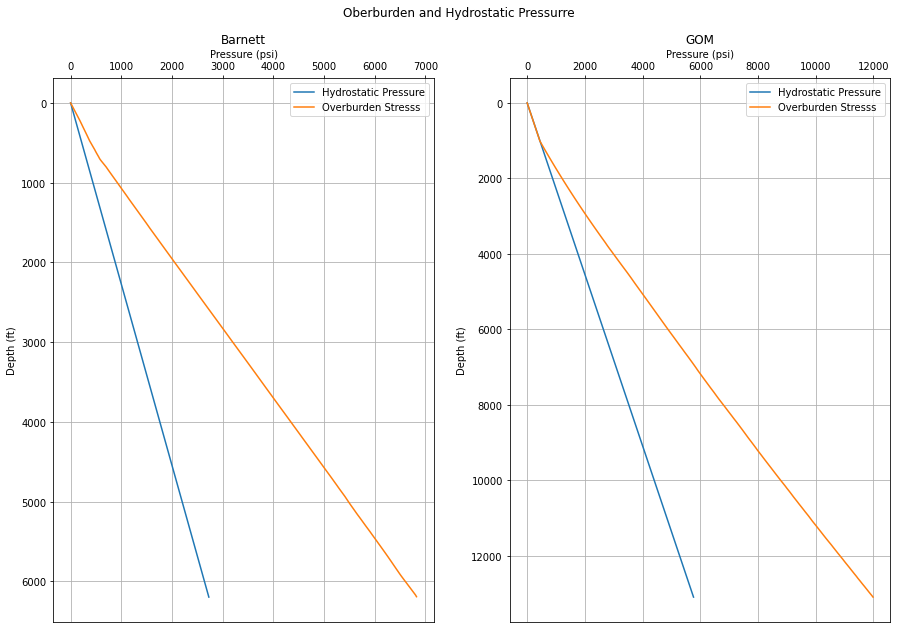

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15 , 10))
fig.suptitle('Oberburden and Hydrostatic Pressurre')

ax1.plot(barnett['Hydrostatic pressure (psi)'], barnett['Depth(ft)'], label='Hydrostatic Pressure')
ax1.plot(barnett['Overburden (psi)'], barnett['Depth(ft)'], label='Overburden Stresss')
ax1.set_title('Barnett')
ax1.legend()
ax1.set_xlabel('Pressure (psi)')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.invert_yaxis()
ax1.set_ylabel('Depth (ft)')

ax1.grid()


ax2.plot(GOM['Hydrostatic pressure (psi)'], GOM['Depth(ft)'], label='Hydrostatic Pressure')
ax2.plot(GOM['Overburden (psi)'], GOM['Depth(ft)'], label='Overburden Stresss')
ax2.set_title('GOM')
ax2.legend()
ax2.set_xlabel('Pressure (psi)')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.invert_yaxis()
ax2.set_ylabel('Depth (ft)')

ax2.grid()
plt.show()

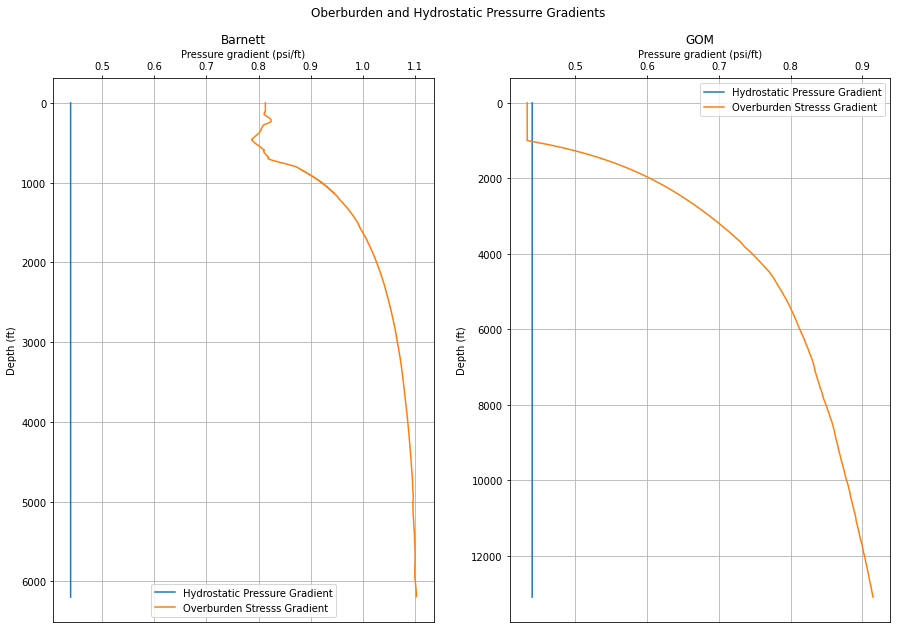

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15 , 10))
fig.suptitle('Oberburden and Hydrostatic Pressurre Gradients')

ax1.plot(barnett['Hydrostatic pressure gradient (psi/ft)'], barnett['Depth(ft)'], label='Hydrostatic Pressure Gradient')
ax1.plot(barnett['Overburden Gradient (psi/ft)'], barnett['Depth(ft)'], label='Overburden Stresss Gradient')
ax1.set_title('Barnett')
ax1.legend()
ax1.set_xlabel('Pressure gradient (psi/ft)')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.invert_yaxis()
ax1.set_ylabel('Depth (ft)')

ax1.grid()


ax2.plot(GOM['Hydrostatic pressure gradient (psi/ft)'], GOM['Depth(ft)'], label='Hydrostatic Pressure Gradient')
ax2.plot(GOM['Overburden Gradient (psi/ft)'], GOM['Depth(ft)'], label='Overburden Stresss Gradient')
ax2.set_title('GOM')
ax2.legend()
ax2.set_xlabel('Pressure gradient (psi/ft)')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.invert_yaxis()
ax2.set_ylabel('Depth (ft)')

ax2.grid()
plt.show()

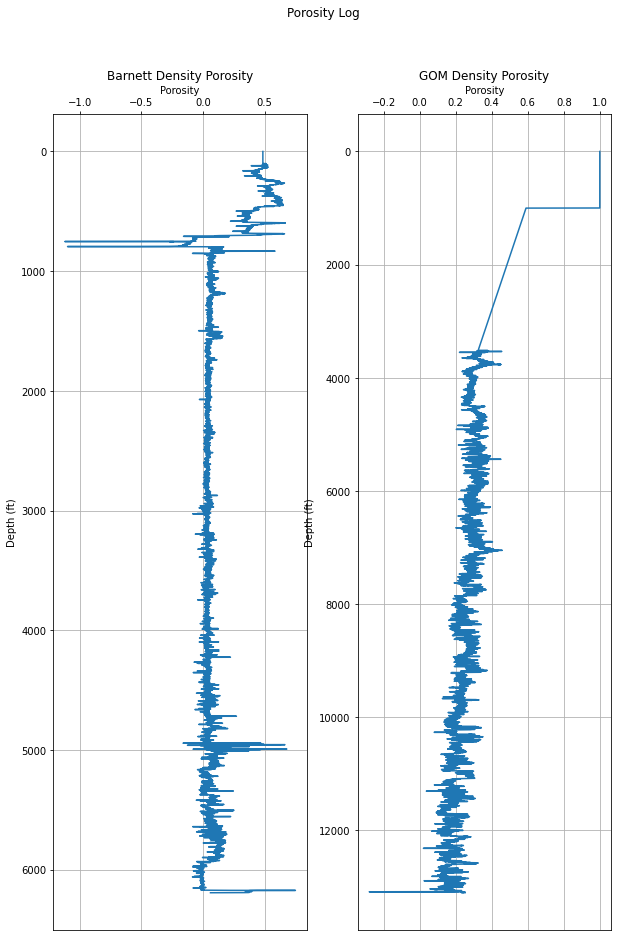

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
fig.suptitle('Porosity Log')

ax1.plot(barnett['Porosity'], barnett['Depth(ft)'])
ax1.set_title('Barnett Density Porosity')
ax1.set_xlabel('Porosity')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.invert_yaxis()
ax1.set_ylabel('Depth (ft)')
ax1.grid()



ax2.plot(GOM['Porosity'], GOM['Depth(ft)'])
ax2.set_title('GOM Density Porosity')
ax2.set_xlabel('Porosity')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.invert_yaxis()
ax2.set_ylabel('Depth (ft)')
ax2.grid()



plt.show()